## Description 

The following data is provided for the various variety of wines having a specific price and points provided by the taster.
Our goal here is to make a regression model that predicts the price and points both for the input provided 

In [1]:
# Importing Lbraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# removing feature "Unnamed: 0"
data.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
data.shape

(129971, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [6]:
# checking for duplicates present inside dataset
data.duplicated().sum()

9983

In [7]:
# droping the duplicate rows
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(119988, 13)

## Exploratory Data Analysis

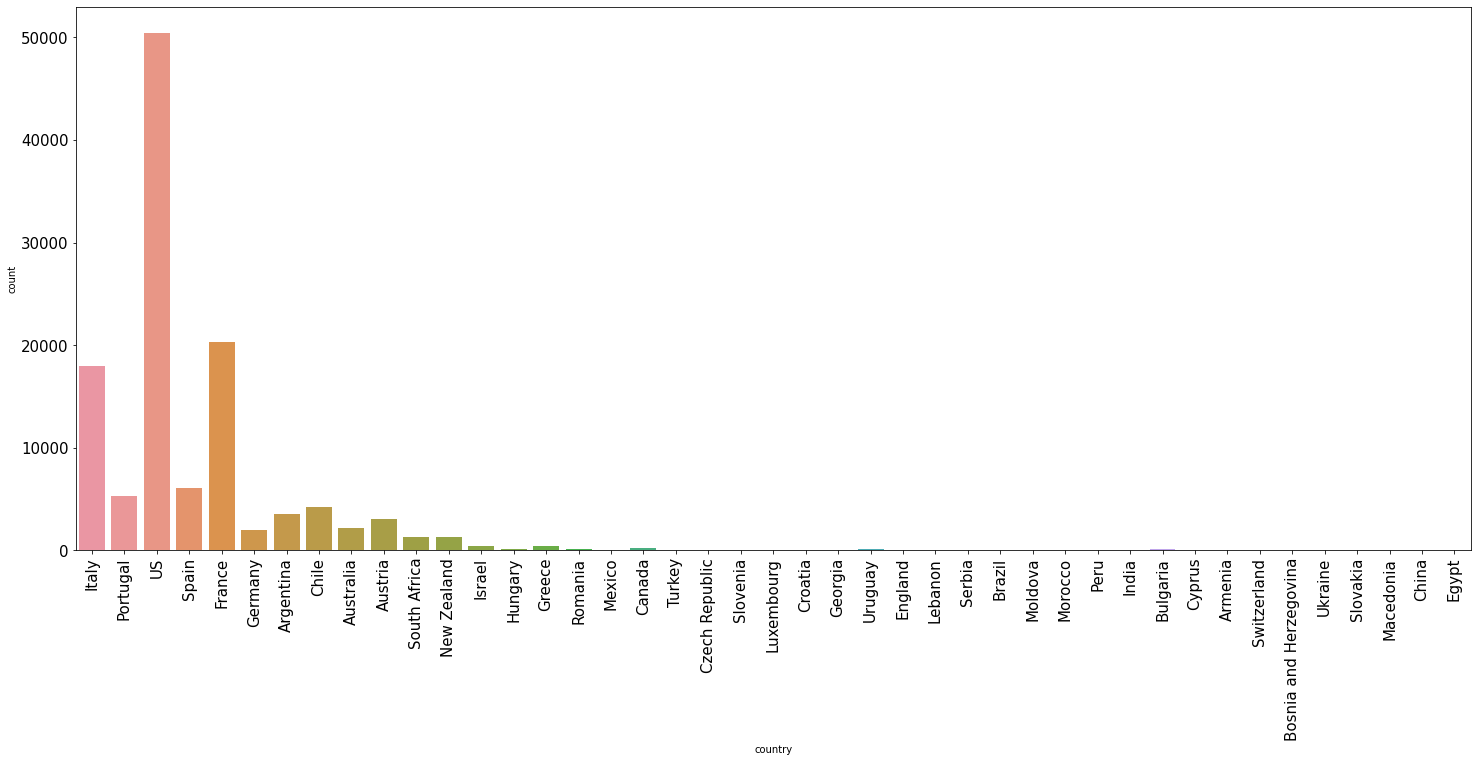

In [9]:
## ------------------------------------------------ Top producers of wine ----------------------------------------------##

plt.figure(figsize = (25,10))
sns.countplot(x= 'country', data=data)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

- Although European Countries are know for its wine, we observe that US is the top most producer.
- Followed by France and Italy in terms of productions.

In [10]:
us_data = data[data['country'] == 'US']

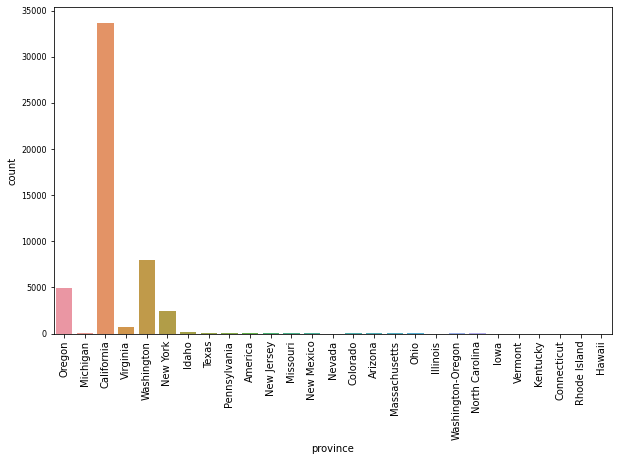

In [11]:
## -------------------------------------- Top consumer of wine as per state in US ---------------------------------------##

plt.figure(figsize = (10,6))
sns.countplot(x= 'province', data=us_data)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

- California is cosider to be the top consumer of wine in US, followed by Washington DC and Oregon.

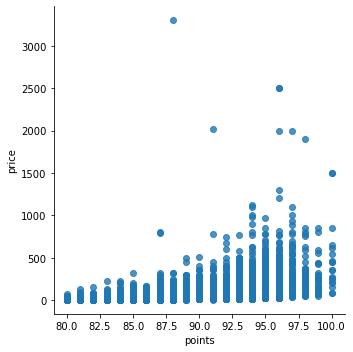

In [12]:
## ------------------------------------General Trend btw Points and Price ---------------------------------------------## 

sns.lmplot(x='points', y='price',data=data, fit_reg=False , palette='inferno')

- Mostly all classes of wines are havving a price range btw 20-1000 $
- We can not conclude that expensive wines are generally have a good class.


#### Assigning grades on the basis of points for better classification

In [99]:
data['Grade']  = data['points']

In [14]:
data['points'].value_counts().index.sort_values()

Int64Index([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
             93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [100]:
## ------------------------------------------ Creating classes for the points given. ---------------------------------------- ##

data['Grade'].replace([80,  81,  82,  83,  84,  85], 'Poor', inplace = True)
data['Grade'].replace([86,  87,  88,  89,  90], 'Moderate', inplace = True)
data['Grade'].replace([91,  92,  93,  94,  95], 'Good', inplace = True)
data['Grade'].replace([96,  97,  98,  99, 100], 'Excellent', inplace = True)

<AxesSubplot:ylabel='Grade'>

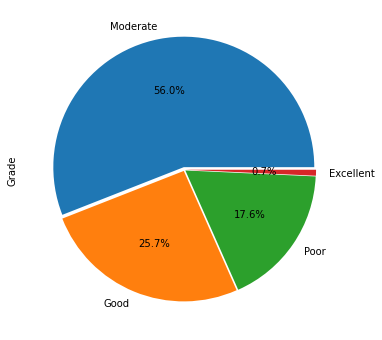

In [16]:
plt.figure(figsize=(7,6))
data['Grade'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', explode = [0.02,0.01,0.01,0.01])

- Around 56% of the reviews given is falling over Moderate class wine having point ranges btw [86-90] followed by Good class.

In [17]:
## ---------------------------- Quality of wine produced by most countries ----------------------------------------- ##

data.pivot_table(values = 'Grade', index = 'country',aggfunc = (lambda x: x.mode()))

,Grade
country,
Argentina,Moderate
Armenia,Moderate
Australia,Moderate
Austria,Moderate
Bosnia and Herzegovina,"[Moderate, Poor]"
Brazil,Poor
Bulgaria,Moderate
Canada,Moderate
Chile,Moderate


- Here we observe that the quality produced among different countries is of mostly Moderate class having points ranging btw (86-90).
- US the top producer is also producing Moderate class wines.

<AxesSubplot:xlabel='Grade'>

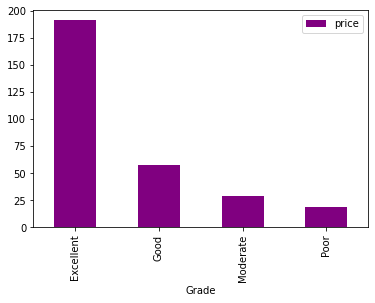

In [18]:
##------------------------------------------ Visualization between Price and Grade ------------------------------------##


pd.set_option('display.max_rows', 1000)
data.pivot_table(values = 'price', index = 'Grade',aggfunc = (lambda x: x.mean())).plot(kind = 'bar', color = 'purple')

- Here  we observe the Price distriution for each class of wine.

- Price range between "4-11" is having "Poor Class wine"
- Price range between "11-48"  is having "Moderate Class wine"
- Price range between "48-250" is having "Good Class wine"
- Price range between "250 and above" are having "Good Class with few Excellent Class"

In [19]:
## ------------------------------------- Creating classes for the price range -----------------------------------------##

data['Price_Category'] = data['price']

In [20]:
data['Price_Category'].replace([4,5,6,7,8,9,10,11], 'Cheap', inplace = True)
data['Price_Category'].replace(np.arange(12,48), 'Affordable', inplace = True)
data['Price_Category'].replace(np.arange(48,245), 'Expensive', inplace = True)
data['Price_Category'].replace(np.arange(245,3301), 'Highly Priced', inplace = True)

In [21]:
data.pivot_table(values = 'Grade', index = 'Price_Category',aggfunc = (lambda x: x.mode()))

,Grade
Price_Category,
Affordable,Moderate
Cheap,Poor
Expensive,Good
Highly Priced,Good


- Cheap wine are generally Poor class.
- Affordable, Expensive and highly priced wines are having both Moderate and good classes.

In [22]:
## --------------------------------Analysis between Variety and the points provided----------------------------------------##

data.pivot_table(values = 'variety', index = 'points',aggfunc = (lambda x: x.mode()))

,variety
points,
80,Chardonnay
81,Chardonnay
82,Chardonnay
83,Chardonnay
84,Chardonnay
85,Chardonnay
86,Chardonnay
87,Chardonnay
88,Pinot Noir


- Chardonnay and Pinot Noir are mostly dominating the wine industry.

In [23]:
from wordcloud import WordCloud, STOPWORDS

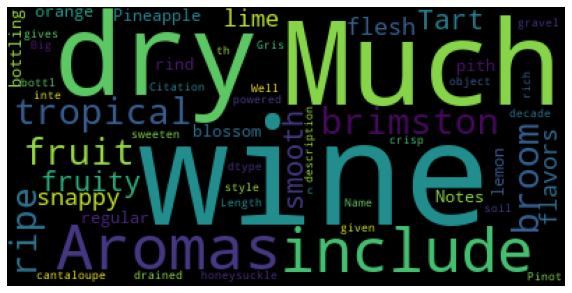

In [24]:
## Analyzing the content of "Description" proided.

stopwords= set(STOPWORDS)
def cloud(data):
    wordcloud = WordCloud(
    stopwords = stopwords,
    max_words =150,
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
cloud(data['description'])

#### Analysis of top contents provided in the description over points 

In [25]:
data['fruit']=data['description'].apply(lambda x:1 if 'fruit'in x.lower()else 0)
data['fruit'].value_counts()

1    60473
0    59515
Name: fruit, dtype: int64

In [26]:
data['lemon']=data['description'].apply(lambda x:1 if 'lemon'in x.lower()else 0)
data['lemon'].value_counts()

0    110234
1      9754
Name: lemon, dtype: int64

In [27]:
data['orange']=data['description'].apply(lambda x:1 if 'orange'in x.lower()else 0)
data['orange'].value_counts()

0    114573
1      5415
Name: orange, dtype: int64

In [28]:
data['pineapple']=data['description'].apply(lambda x:1 if 'pineapple'in x.lower()else 0)
data['pineapple'].value_counts()

0    116023
1      3965
Name: pineapple, dtype: int64

In [29]:
data['tropical']=data['description'].apply(lambda x:1 if 'tropical'in x.lower()else 0)
data['tropical'].value_counts()

0    116505
1      3483
Name: tropical, dtype: int64

In [30]:
data['ripe']=data['description'].apply(lambda x:1 if 'ripe'in x.lower()else 0)
data['ripe'].value_counts()

0    92454
1    27534
Name: ripe, dtype: int64

In [31]:
data['brimston']=data['description'].apply(lambda x:1 if 'brimston'in x.lower()else 0)
data['brimston'].value_counts()

0    119933
1        55
Name: brimston, dtype: int64

In [32]:
data['smooth']=data['description'].apply(lambda x:1 if 'smooth'in x.lower()else 0)
data['smooth'].value_counts()

0    112644
1      7344
Name: smooth, dtype: int64

<AxesSubplot:xlabel='points', ylabel='Count'>

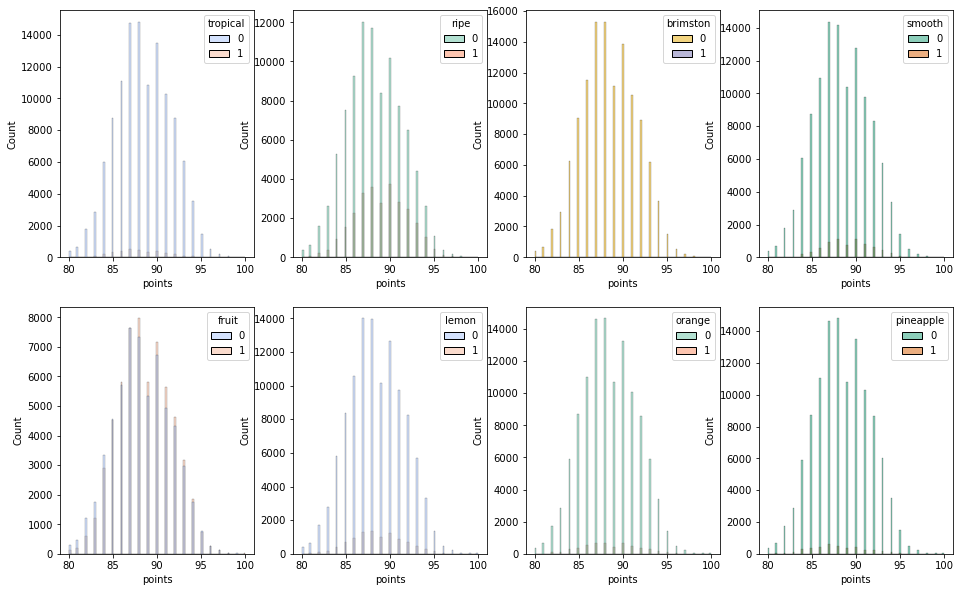

In [33]:
fig, ax = plt.subplots(2,4, figsize = (16, 10))

sns.histplot(x= 'points', hue = 'tropical', data =data ,palette = 'coolwarm', ax = ax[0][0])
sns.histplot(x= 'points', hue = 'ripe', data =data, palette = 'Set2', ax = ax[0][1])
sns.histplot(x= 'points', hue = 'brimston', data =data, palette = 'Dark2_r', ax = ax[0][2])
sns.histplot(x= 'points', hue = 'smooth', data =data, palette = 'Dark2', ax = ax[0][3])
sns.histplot(x= 'points', hue = 'fruit', data =data, palette = 'coolwarm', ax = ax[1][0])
sns.histplot(x= 'points', hue = 'lemon', data =data ,palette = 'coolwarm', ax = ax[1][1])
sns.histplot(x= 'points', hue = 'orange', data =data, palette = 'Set2', ax = ax[1][2])
sns.histplot(x= 'points', hue = 'pineapple', data =data, palette = 'Dark2', ax = ax[1][3])

- Having 'Fruit Content' provided in the description of the wine contriuting a good sales for the Moderate class wine.
- It has been clearly observed that adding prases like "lemon, orange, pineapple" does not contribute for having a higher sales.
- Only "Ripe" word in the  description have some impact in the sales of the wine.

## Feature Engineering

In [34]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'Grade', 'Price_Category', 'fruit', 'lemon',
       'orange', 'pineapple', 'tropical', 'ripe', 'brimston', 'smooth'],
      dtype='object')

In [35]:
data.drop(['taster_twitter_handle', 'Grade', 'Price_Category', 'fruit', 'lemon','orange', 'pineapple', 'tropical', 'ripe', 'brimston', 'smooth'],
           axis  =1 , inplace = True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      119929 non-null  object 
 1   description  119988 non-null  object 
 2   designation  85443 non-null   object 
 3   points       119988 non-null  int64  
 4   price        111593 non-null  float64
 5   province     119929 non-null  object 
 6   region_1     100428 non-null  object 
 7   region_2     46769 non-null   object 
 8   taster_name  95071 non-null   object 
 9   title        119988 non-null  object 
 10  variety      119987 non-null  object 
 11  winery       119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 15.9+ MB


In [37]:
data.describe()

,points,price
count,119988.000000,111593.000000
mean,88.442236,35.620747
std,3.092915,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


#### Handeling Missing values

In [38]:
data.isnull().sum()

country           59
description        0
designation    34545
points             0
price           8395
province          59
region_1       19560
region_2       73219
taster_name    24917
title              0
variety            1
winery             0
dtype: int64

In [39]:
## Filling Null Values for country.

data['country'] = data['country'].fillna(data['country'].mode()[0])

In [40]:
## Filling Null Values for provience.

data['province'] = data['province'].fillna(data['province'].mode()[0])

In [41]:
mode_of_designation = data.pivot_table(values = 'designation', columns = 'country', aggfunc = (lambda x:x.mode()))
pd.set_option('display.max_rows', 1000)
mode_of_designation

country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
designation,Reserva,Estate Bottled,Reserve,Reserve,Vranac,Brut,Veni Vidi Vici,Icewine,Reserva,Noble Dragon,...,Margus Margi,[],Hand Harvested Estate Bottled,Reserve,Crianza,"[Carato, Dôle des Monts, Les Murettes]",Reserve,Reserve,Reserve,Reserva


In [42]:
# Filling the null values of designation with mode data of dsignation per country.

missing_values = data['designation'].isnull()
data.loc[missing_values, 'designation'] = data.loc[missing_values, 'country'].apply(lambda x : mode_of_designation[x])

In [43]:
## Droping 'region_2' as it consist of more than 50% null values in dataset
data.drop('region_2', axis =1, inplace = True)

In [44]:
data.isnull().sum()

country            0
description        0
designation        0
points             0
price           8395
province           0
region_1       19560
taster_name    24917
title              0
variety            1
winery             0
dtype: int64

In [45]:
# filling null values for taster name

mode_of_taster_name = data.pivot_table(values = 'taster_name', columns = 'country', aggfunc = (lambda x:x.mode()))

mode_of_taster_name

country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
taster_name,Michael Schachner,Mike DeSimone,Joe Czerwinski,Anne Krebiehl MW,"[Anna Lee C. Iijima, Jeff Jenssen]",Michael Schachner,Jeff Jenssen,Paul Gregutt,Michael Schachner,Mike DeSimone,...,Jeff Jenssen,Anna Lee C. Iijima,Jeff Jenssen,Lauren Buzzeo,Michael Schachner,Jeff Jenssen,Mike DeSimone,Virginie Boone,Jeff Jenssen,Michael Schachner


In [46]:
missing_values = data['taster_name'].isnull()
data.loc[missing_values, 'taster_name'] = data.loc[missing_values, 'country'].apply(lambda x : mode_of_taster_name[x])

In [47]:
mode_of_region_1 = data.pivot_table(values = 'region_1', columns = 'country', aggfunc = (lambda x:x.mode()))
mode_of_region_1

country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
region_1,Mendoza,[],McLaren Vale,[],[],[],[],Okanagan Valley,[],[],...,[],[],[],[],Rioja,[],[],Napa Valley,[],[]


In [48]:
missing_values = data['region_1'].isnull()
data.loc[missing_values, 'region_1'] = data.loc[missing_values, 'country'].apply(lambda x : mode_of_region_1[x])

In [49]:
data.dropna( inplace= True)

In [50]:
data.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

## Handeling Outliers

<AxesSubplot:xlabel='price', ylabel='Density'>

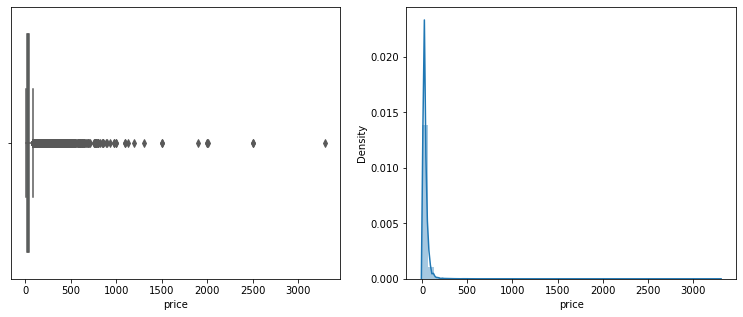

In [51]:
fig , ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(data['price'], palette = 'Set2' , ax=ax[0])
sns.distplot(data['price'] , ax=ax[1])

In [52]:
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.price >= Q1-3*IQR) & (data.price <= Q3+3*IQR) ]

<AxesSubplot:xlabel='price', ylabel='Density'>

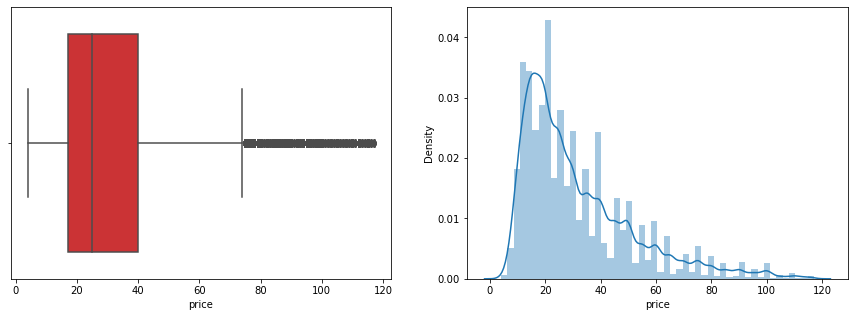

In [53]:
fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data['price'], palette = 'Set1' , ax=ax[0])
sns.distplot(data['price'] , ax=ax[1])

<AxesSubplot:xlabel='points', ylabel='Density'>

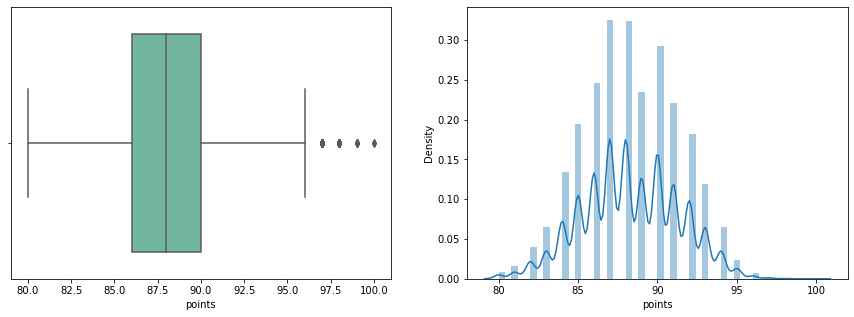

In [54]:
fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data['points'], palette = 'Set2' , ax=ax[0])
sns.distplot(data['points'] , ax=ax[1])

In [55]:
Q1 = data.points.quantile(0.25)
Q3 = data.points.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.points >= Q1-1.5*IQR) & (data.points <= Q3+1.5*IQR) ]

<AxesSubplot:xlabel='points', ylabel='Density'>

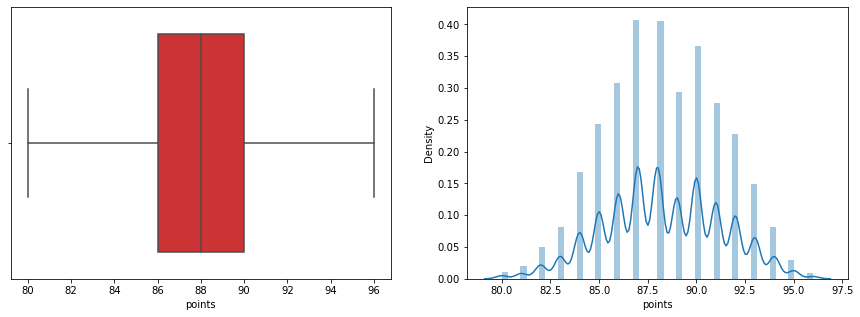

In [56]:
fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data['points'], palette = 'Set1' , ax=ax[0])
sns.distplot(data['points'] , ax=ax[1])

## Feature Selection

<AxesSubplot:>

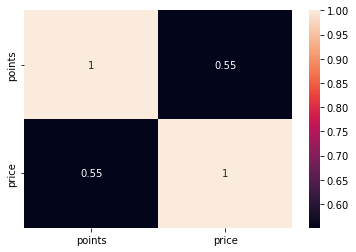

In [57]:
sns.heatmap(data.corr(), annot = True)

- We can easily observe that points and price are highly correlated.

## Model Building

## ----------Points Prediction-------------

In [208]:
# Since our dataset is highly consist of categorical values best would be to go with Catboost Algo.

In [58]:
from catboost import CatBoostRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [73]:
df_model = data[['country', 'province', 'taster_name',  'variety', 'winery', 'points', 'price']]

In [74]:
df_model.isnull().sum()

country        0
province       0
taster_name    0
variety        0
winery         0
points         0
price          0
dtype: int64

In [75]:
df_model.head()

,country,province,taster_name,variety,winery,points,price
1,Portugal,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,87,15.0
2,US,Oregon,Paul Gregutt,Pinot Gris,Rainstorm,87,14.0
3,US,Michigan,Alexander Peartree,Riesling,St. Julian,87,13.0
4,US,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks,87,65.0
5,Spain,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem,87,15.0


In [76]:
X = df_model.drop('points', axis =1)
y = df_model['points']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [78]:
df_model.head()

,country,province,taster_name,variety,winery,points,price
1,Portugal,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,87,15.0
2,US,Oregon,Paul Gregutt,Pinot Gris,Rainstorm,87,14.0
3,US,Michigan,Alexander Peartree,Riesling,St. Julian,87,13.0
4,US,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks,87,65.0
5,Spain,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem,87,15.0


In [79]:
cat_features = ['country', 'province', 'taster_name','variety','winery']

In [ ]:
model_cb = CatBoostRegressor(iterations=1000, random_seed =360 , loss_function= 'RMSE')

In [80]:
model_cb.fit(X_train,y_train, cat_features= cat_features,  plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.082088
0:	learn: 2.9195216	total: 352ms	remaining: 5m 52s
1:	learn: 2.8422309	total: 509ms	remaining: 4m 13s
2:	learn: 2.7737136	total: 655ms	remaining: 3m 37s
3:	learn: 2.7152434	total: 838ms	remaining: 3m 28s
4:	learn: 2.6638411	total: 955ms	remaining: 3m 10s
5:	learn: 2.6176039	total: 1.09s	remaining: 3m 1s
6:	learn: 2.5769992	total: 1.21s	remaining: 2m 51s
7:	learn: 2.5420544	total: 1.35s	remaining: 2m 47s
8:	learn: 2.5106754	total: 1.5s	remaining: 2m 45s
9:	learn: 2.4843769	total: 1.66s	remaining: 2m 43s
10:	learn: 2.4605537	total: 1.8s	remaining: 2m 42s
11:	learn: 2.4396949	total: 1.98s	remaining: 2m 43s
12:	learn: 2.4202836	total: 2.12s	remaining: 2m 41s
13:	learn: 2.3942659	total: 2.24s	remaining: 2m 37s
14:	learn: 2.3715219	total: 2.36s	remaining: 2m 34s
15:	learn: 2.3510071	total: 2.52s	remaining: 2m 34s
16:	learn: 2.3334532	total: 2.65s	remaining: 2m 33s
17:	learn: 2.3180855	total: 2.75s	remaining: 2m 30s
18:	learn: 2.3042360	total: 2.87s	remaining: 2m

159:	learn: 2.1218099	total: 17.7s	remaining: 1m 32s
160:	learn: 2.1216510	total: 17.8s	remaining: 1m 32s
161:	learn: 2.1214948	total: 17.9s	remaining: 1m 32s
162:	learn: 2.1213572	total: 18s	remaining: 1m 32s
163:	learn: 2.1210388	total: 18.1s	remaining: 1m 32s
164:	learn: 2.1207522	total: 18.2s	remaining: 1m 32s
165:	learn: 2.1206072	total: 18.3s	remaining: 1m 32s
166:	learn: 2.1203649	total: 18.4s	remaining: 1m 31s
167:	learn: 2.1202360	total: 18.5s	remaining: 1m 31s
168:	learn: 2.1199438	total: 18.6s	remaining: 1m 31s
169:	learn: 2.1197391	total: 18.7s	remaining: 1m 31s
170:	learn: 2.1195244	total: 18.9s	remaining: 1m 31s
171:	learn: 2.1192146	total: 19s	remaining: 1m 31s
172:	learn: 2.1191306	total: 19.1s	remaining: 1m 31s
173:	learn: 2.1190101	total: 19.3s	remaining: 1m 31s
174:	learn: 2.1187770	total: 19.4s	remaining: 1m 31s
175:	learn: 2.1185978	total: 19.5s	remaining: 1m 31s
176:	learn: 2.1183013	total: 19.7s	remaining: 1m 31s
177:	learn: 2.1180824	total: 19.8s	remaining: 1m 3

316:	learn: 2.0938137	total: 34.3s	remaining: 1m 13s
317:	learn: 2.0936887	total: 34.4s	remaining: 1m 13s
318:	learn: 2.0936426	total: 34.5s	remaining: 1m 13s
319:	learn: 2.0935377	total: 34.6s	remaining: 1m 13s
320:	learn: 2.0935132	total: 34.6s	remaining: 1m 13s
321:	learn: 2.0934617	total: 34.7s	remaining: 1m 13s
322:	learn: 2.0932583	total: 34.8s	remaining: 1m 12s
323:	learn: 2.0932268	total: 34.9s	remaining: 1m 12s
324:	learn: 2.0929099	total: 35s	remaining: 1m 12s
325:	learn: 2.0928524	total: 35.1s	remaining: 1m 12s
326:	learn: 2.0927782	total: 35.2s	remaining: 1m 12s
327:	learn: 2.0926021	total: 35.3s	remaining: 1m 12s
328:	learn: 2.0924592	total: 35.5s	remaining: 1m 12s
329:	learn: 2.0923027	total: 35.6s	remaining: 1m 12s
330:	learn: 2.0922061	total: 35.7s	remaining: 1m 12s
331:	learn: 2.0920717	total: 35.8s	remaining: 1m 11s
332:	learn: 2.0919724	total: 35.8s	remaining: 1m 11s
333:	learn: 2.0919397	total: 35.9s	remaining: 1m 11s
334:	learn: 2.0917486	total: 36s	remaining: 1m 1

475:	learn: 2.0785227	total: 49.5s	remaining: 54.4s
476:	learn: 2.0784448	total: 49.5s	remaining: 54.3s
477:	learn: 2.0783280	total: 49.6s	remaining: 54.2s
478:	learn: 2.0781883	total: 49.7s	remaining: 54.1s
479:	learn: 2.0780973	total: 49.8s	remaining: 54s
480:	learn: 2.0780028	total: 49.9s	remaining: 53.8s
481:	learn: 2.0778755	total: 50s	remaining: 53.7s
482:	learn: 2.0778011	total: 50.1s	remaining: 53.6s
483:	learn: 2.0777274	total: 50.2s	remaining: 53.5s
484:	learn: 2.0776438	total: 50.3s	remaining: 53.4s
485:	learn: 2.0775908	total: 50.4s	remaining: 53.3s
486:	learn: 2.0775107	total: 50.5s	remaining: 53.2s
487:	learn: 2.0774101	total: 50.5s	remaining: 53s
488:	learn: 2.0772846	total: 50.7s	remaining: 52.9s
489:	learn: 2.0772396	total: 50.7s	remaining: 52.8s
490:	learn: 2.0771457	total: 50.8s	remaining: 52.7s
491:	learn: 2.0770857	total: 50.9s	remaining: 52.6s
492:	learn: 2.0768689	total: 51s	remaining: 52.5s
493:	learn: 2.0767445	total: 51.1s	remaining: 52.3s
494:	learn: 2.076618

637:	learn: 2.0665578	total: 1m 6s	remaining: 37.8s
638:	learn: 2.0665252	total: 1m 6s	remaining: 37.7s
639:	learn: 2.0664717	total: 1m 6s	remaining: 37.5s
640:	learn: 2.0664385	total: 1m 6s	remaining: 37.4s
641:	learn: 2.0663867	total: 1m 6s	remaining: 37.3s
642:	learn: 2.0663502	total: 1m 7s	remaining: 37.2s
643:	learn: 2.0663014	total: 1m 7s	remaining: 37.1s
644:	learn: 2.0662561	total: 1m 7s	remaining: 37s
645:	learn: 2.0662028	total: 1m 7s	remaining: 36.8s
646:	learn: 2.0661163	total: 1m 7s	remaining: 36.7s
647:	learn: 2.0660515	total: 1m 7s	remaining: 36.6s
648:	learn: 2.0659875	total: 1m 7s	remaining: 36.6s
649:	learn: 2.0659085	total: 1m 7s	remaining: 36.5s
650:	learn: 2.0658396	total: 1m 7s	remaining: 36.4s
651:	learn: 2.0657836	total: 1m 7s	remaining: 36.3s
652:	learn: 2.0657612	total: 1m 8s	remaining: 36.1s
653:	learn: 2.0657201	total: 1m 8s	remaining: 36s
654:	learn: 2.0656365	total: 1m 8s	remaining: 35.9s
655:	learn: 2.0655845	total: 1m 8s	remaining: 35.8s
656:	learn: 2.06

793:	learn: 2.0574613	total: 1m 22s	remaining: 21.3s
794:	learn: 2.0573550	total: 1m 22s	remaining: 21.2s
795:	learn: 2.0572974	total: 1m 22s	remaining: 21.1s
796:	learn: 2.0572718	total: 1m 22s	remaining: 21s
797:	learn: 2.0571512	total: 1m 22s	remaining: 20.9s
798:	learn: 2.0570696	total: 1m 22s	remaining: 20.8s
799:	learn: 2.0570475	total: 1m 22s	remaining: 20.7s
800:	learn: 2.0570135	total: 1m 22s	remaining: 20.6s
801:	learn: 2.0569659	total: 1m 22s	remaining: 20.5s
802:	learn: 2.0569092	total: 1m 23s	remaining: 20.4s
803:	learn: 2.0568376	total: 1m 23s	remaining: 20.3s
804:	learn: 2.0567972	total: 1m 23s	remaining: 20.2s
805:	learn: 2.0567226	total: 1m 23s	remaining: 20.1s
806:	learn: 2.0566314	total: 1m 23s	remaining: 20s
807:	learn: 2.0566031	total: 1m 23s	remaining: 19.8s
808:	learn: 2.0565930	total: 1m 23s	remaining: 19.7s
809:	learn: 2.0564894	total: 1m 23s	remaining: 19.6s
810:	learn: 2.0563532	total: 1m 23s	remaining: 19.5s
811:	learn: 2.0561939	total: 1m 23s	remaining: 19.

950:	learn: 2.0491532	total: 1m 38s	remaining: 5.09s
951:	learn: 2.0491221	total: 1m 38s	remaining: 4.98s
952:	learn: 2.0490923	total: 1m 38s	remaining: 4.88s
953:	learn: 2.0490669	total: 1m 39s	remaining: 4.78s
954:	learn: 2.0490321	total: 1m 39s	remaining: 4.67s
955:	learn: 2.0489820	total: 1m 39s	remaining: 4.57s
956:	learn: 2.0489051	total: 1m 39s	remaining: 4.46s
957:	learn: 2.0488402	total: 1m 39s	remaining: 4.36s
958:	learn: 2.0488014	total: 1m 39s	remaining: 4.26s
959:	learn: 2.0486800	total: 1m 39s	remaining: 4.15s
960:	learn: 2.0486126	total: 1m 39s	remaining: 4.05s
961:	learn: 2.0485487	total: 1m 39s	remaining: 3.94s
962:	learn: 2.0485432	total: 1m 39s	remaining: 3.84s
963:	learn: 2.0484362	total: 1m 40s	remaining: 3.74s
964:	learn: 2.0483673	total: 1m 40s	remaining: 3.64s
965:	learn: 2.0483101	total: 1m 40s	remaining: 3.53s
966:	learn: 2.0482840	total: 1m 40s	remaining: 3.43s
967:	learn: 2.0482460	total: 1m 40s	remaining: 3.32s
968:	learn: 2.0481302	total: 1m 40s	remaining:

In [81]:
y_pred=model_cb.predict(X_test)

In [82]:
from sklearn import metrics

In [83]:
print('Mean absolute error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 1.6218108762526326
Mean Squared error: 4.236366351531649
Root Mean squared error: 2.058243511232733


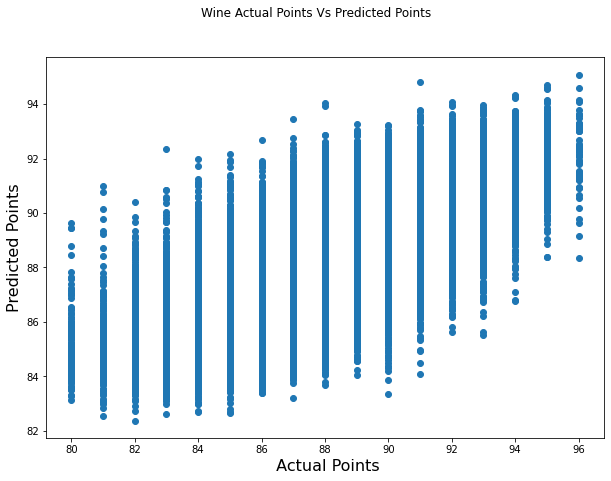

In [98]:
#Plot the scatter plot for the error term
fig=plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel(' Actual Points',fontsize=16)
plt.ylabel('Predicted Points',fontsize=16)
plt.suptitle('Wine Actual Points Vs Predicted Points')

plt.show()

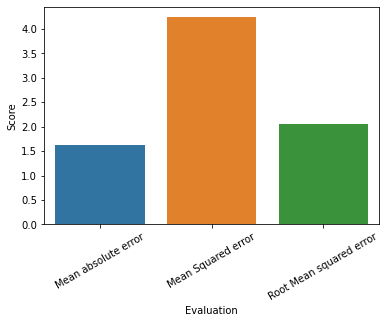

In [238]:
pf = [['Mean absolute error', 1.6218108], ['Mean Squared error', 4.2363663], ['Root Mean squared error', 2.0582435]]
df = pd.DataFrame(pf, columns=['Evaluation', 'Score'])
sns.barplot(data=df,x='Evaluation',y='Score')
plt.xticks(rotation=30)
plt.show()

## Remarks 
- While dealing with the classification of points as a regression part our model performs well, with giving almost negligible amounts of errors.

## Classification based on Groups

In [103]:
#### Giving the grades based on points for the wines

data['Grade']  = data['points']

In [104]:
data['Grade'].replace([80,  81,  82,  83,  84,  85], 'D', inplace = True)
data['Grade'].replace([86,  87,  88,  89,  90], 'C', inplace = True)
data['Grade'].replace([91,  92,  93,  94,  95], 'B', inplace = True)
data['Grade'].replace([96,  97,  98,  99, 100], 'A', inplace = True)

In [105]:
data.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,Grade
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,[],Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,C
2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,C
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,C
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,C
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,C


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [108]:
data['Grade'] = le.fit_transform(data['Grade'])

In [146]:
data.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,Grade
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,[],Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2


In [147]:
df_model = data[['country', 'province', 'taster_name',  'variety', 'winery', 'points', 'price','Grade']]

In [148]:
df_model.head()

,country,province,taster_name,variety,winery,points,price,Grade
1,Portugal,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,87,15.0,2
2,US,Oregon,Paul Gregutt,Pinot Gris,Rainstorm,87,14.0,2
3,US,Michigan,Alexander Peartree,Riesling,St. Julian,87,13.0,2
4,US,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks,87,65.0,2
5,Spain,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem,87,15.0,2


In [193]:
X = df_model.drop(['points','Grade'], axis =1)
y = df_model['Grade']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [154]:
cat_features = ['country', 'province', 'taster_name','variety','winery']

In [155]:
from catboost import CatBoostClassifier

In [158]:
model_cb = CatBoostClassifier(iterations=1000, random_state =3620 )

In [159]:
model_cb.fit(X_train,y_train, cat_features= cat_features,  plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099046
0:	learn: 1.2890089	total: 602ms	remaining: 10m 1s
1:	learn: 1.2131640	total: 1.22s	remaining: 10m 11s
2:	learn: 1.1513355	total: 1.88s	remaining: 10m 25s
3:	learn: 1.1011397	total: 2.59s	remaining: 10m 45s
4:	learn: 1.0602397	total: 3.2s	remaining: 10m 36s
5:	learn: 1.0251526	total: 3.75s	remaining: 10m 21s
6:	learn: 0.9952576	total: 4.2s	remaining: 9m 55s
7:	learn: 0.9696520	total: 4.7s	remaining: 9m 42s
8:	learn: 0.9462866	total: 5.21s	remaining: 9m 33s
9:	learn: 0.9267937	total: 5.75s	remaining: 9m 28s
10:	learn: 0.9091203	total: 6.32s	remaining: 9m 27s
11:	learn: 0.8939003	total: 7.02s	remaining: 9m 38s
12:	learn: 0.8805637	total: 7.5s	remaining: 9m 29s
13:	learn: 0.8687045	total: 8.25s	remaining: 9m 40s
14:	learn: 0.8576528	total: 8.79s	remaining: 9m 37s
15:	learn: 0.8486040	total: 9.3s	remaining: 9m 32s
16:	learn: 0.8367238	total: 9.89s	remaining: 9m 31s
17:	learn: 0.8262187	total: 10.4s	remaining: 9m 27s
18:	learn: 0.8159463	total: 10.8s	remaining:

158:	learn: 0.7050233	total: 1m 18s	remaining: 6m 55s
159:	learn: 0.7049118	total: 1m 19s	remaining: 6m 55s
160:	learn: 0.7045675	total: 1m 19s	remaining: 6m 55s
161:	learn: 0.7043060	total: 1m 20s	remaining: 6m 54s
162:	learn: 0.7041695	total: 1m 20s	remaining: 6m 54s
163:	learn: 0.7038465	total: 1m 21s	remaining: 6m 54s
164:	learn: 0.7037669	total: 1m 21s	remaining: 6m 54s
165:	learn: 0.7035972	total: 1m 22s	remaining: 6m 53s
166:	learn: 0.7034194	total: 1m 22s	remaining: 6m 53s
167:	learn: 0.7033039	total: 1m 23s	remaining: 6m 53s
168:	learn: 0.7031614	total: 1m 24s	remaining: 6m 53s
169:	learn: 0.7028733	total: 1m 24s	remaining: 6m 53s
170:	learn: 0.7026783	total: 1m 25s	remaining: 6m 52s
171:	learn: 0.7024719	total: 1m 25s	remaining: 6m 51s
172:	learn: 0.7023822	total: 1m 26s	remaining: 6m 51s
173:	learn: 0.7022174	total: 1m 26s	remaining: 6m 50s
174:	learn: 0.7020544	total: 1m 26s	remaining: 6m 49s
175:	learn: 0.7019361	total: 1m 27s	remaining: 6m 48s
176:	learn: 0.7017502	total:

311:	learn: 0.6895092	total: 2m 31s	remaining: 5m 34s
312:	learn: 0.6894333	total: 2m 32s	remaining: 5m 34s
313:	learn: 0.6893434	total: 2m 32s	remaining: 5m 33s
314:	learn: 0.6893032	total: 2m 33s	remaining: 5m 32s
315:	learn: 0.6892526	total: 2m 33s	remaining: 5m 32s
316:	learn: 0.6892150	total: 2m 34s	remaining: 5m 31s
317:	learn: 0.6890945	total: 2m 34s	remaining: 5m 31s
318:	learn: 0.6890120	total: 2m 35s	remaining: 5m 30s
319:	learn: 0.6889648	total: 2m 35s	remaining: 5m 30s
320:	learn: 0.6889040	total: 2m 35s	remaining: 5m 29s
321:	learn: 0.6888909	total: 2m 36s	remaining: 5m 29s
322:	learn: 0.6888274	total: 2m 36s	remaining: 5m 28s
323:	learn: 0.6887793	total: 2m 37s	remaining: 5m 28s
324:	learn: 0.6886854	total: 2m 37s	remaining: 5m 27s
325:	learn: 0.6885781	total: 2m 38s	remaining: 5m 27s
326:	learn: 0.6885309	total: 2m 38s	remaining: 5m 26s
327:	learn: 0.6884615	total: 2m 39s	remaining: 5m 26s
328:	learn: 0.6883727	total: 2m 39s	remaining: 5m 25s
329:	learn: 0.6883009	total:

464:	learn: 0.6799622	total: 3m 44s	remaining: 4m 18s
465:	learn: 0.6799112	total: 3m 44s	remaining: 4m 17s
466:	learn: 0.6798843	total: 3m 45s	remaining: 4m 16s
467:	learn: 0.6798096	total: 3m 45s	remaining: 4m 16s
468:	learn: 0.6797561	total: 3m 46s	remaining: 4m 15s
469:	learn: 0.6797200	total: 3m 46s	remaining: 4m 15s
470:	learn: 0.6796512	total: 3m 46s	remaining: 4m 14s
471:	learn: 0.6795401	total: 3m 47s	remaining: 4m 14s
472:	learn: 0.6794988	total: 3m 47s	remaining: 4m 13s
473:	learn: 0.6794423	total: 3m 48s	remaining: 4m 13s
474:	learn: 0.6794121	total: 3m 48s	remaining: 4m 12s
475:	learn: 0.6793668	total: 3m 49s	remaining: 4m 12s
476:	learn: 0.6792983	total: 3m 49s	remaining: 4m 11s
477:	learn: 0.6792045	total: 3m 50s	remaining: 4m 11s
478:	learn: 0.6791600	total: 3m 50s	remaining: 4m 10s
479:	learn: 0.6791047	total: 3m 50s	remaining: 4m 10s
480:	learn: 0.6790672	total: 3m 51s	remaining: 4m 9s
481:	learn: 0.6790349	total: 3m 51s	remaining: 4m 9s
482:	learn: 0.6789744	total: 3

617:	learn: 0.6714973	total: 4m 57s	remaining: 3m 3s
618:	learn: 0.6714316	total: 4m 57s	remaining: 3m 3s
619:	learn: 0.6713643	total: 4m 58s	remaining: 3m 2s
620:	learn: 0.6712852	total: 4m 58s	remaining: 3m 2s
621:	learn: 0.6712553	total: 4m 59s	remaining: 3m 1s
622:	learn: 0.6712144	total: 4m 59s	remaining: 3m 1s
623:	learn: 0.6711357	total: 5m	remaining: 3m
624:	learn: 0.6710913	total: 5m	remaining: 3m
625:	learn: 0.6710502	total: 5m 1s	remaining: 2m 59s
626:	learn: 0.6710217	total: 5m 1s	remaining: 2m 59s
627:	learn: 0.6709954	total: 5m 2s	remaining: 2m 59s
628:	learn: 0.6709591	total: 5m 2s	remaining: 2m 58s
629:	learn: 0.6708899	total: 5m 3s	remaining: 2m 58s
630:	learn: 0.6708137	total: 5m 3s	remaining: 2m 57s
631:	learn: 0.6707342	total: 5m 4s	remaining: 2m 57s
632:	learn: 0.6706668	total: 5m 4s	remaining: 2m 56s
633:	learn: 0.6705664	total: 5m 5s	remaining: 2m 56s
634:	learn: 0.6704860	total: 5m 5s	remaining: 2m 55s
635:	learn: 0.6704358	total: 5m 6s	remaining: 2m 55s
636:	le

771:	learn: 0.6634913	total: 6m 14s	remaining: 1m 50s
772:	learn: 0.6634624	total: 6m 14s	remaining: 1m 50s
773:	learn: 0.6634095	total: 6m 15s	remaining: 1m 49s
774:	learn: 0.6633572	total: 6m 15s	remaining: 1m 49s
775:	learn: 0.6633130	total: 6m 16s	remaining: 1m 48s
776:	learn: 0.6632506	total: 6m 16s	remaining: 1m 48s
777:	learn: 0.6632031	total: 6m 17s	remaining: 1m 47s
778:	learn: 0.6631342	total: 6m 17s	remaining: 1m 47s
779:	learn: 0.6630792	total: 6m 18s	remaining: 1m 46s
780:	learn: 0.6630070	total: 6m 18s	remaining: 1m 46s
781:	learn: 0.6629704	total: 6m 19s	remaining: 1m 45s
782:	learn: 0.6629540	total: 6m 19s	remaining: 1m 45s
783:	learn: 0.6628983	total: 6m 19s	remaining: 1m 44s
784:	learn: 0.6628200	total: 6m 20s	remaining: 1m 44s
785:	learn: 0.6627842	total: 6m 20s	remaining: 1m 43s
786:	learn: 0.6627675	total: 6m 21s	remaining: 1m 43s
787:	learn: 0.6627337	total: 6m 21s	remaining: 1m 42s
788:	learn: 0.6627002	total: 6m 22s	remaining: 1m 42s
789:	learn: 0.6626626	total:

925:	learn: 0.6561203	total: 7m 33s	remaining: 36.3s
926:	learn: 0.6560701	total: 7m 34s	remaining: 35.8s
927:	learn: 0.6560481	total: 7m 35s	remaining: 35.3s
928:	learn: 0.6560164	total: 7m 35s	remaining: 34.8s
929:	learn: 0.6559611	total: 7m 36s	remaining: 34.3s
930:	learn: 0.6559038	total: 7m 36s	remaining: 33.8s
931:	learn: 0.6558607	total: 7m 37s	remaining: 33.3s
932:	learn: 0.6558148	total: 7m 37s	remaining: 32.9s
933:	learn: 0.6557892	total: 7m 37s	remaining: 32.4s
934:	learn: 0.6557596	total: 7m 38s	remaining: 31.9s
935:	learn: 0.6557023	total: 7m 39s	remaining: 31.4s
936:	learn: 0.6556820	total: 7m 39s	remaining: 30.9s
937:	learn: 0.6556463	total: 7m 40s	remaining: 30.4s
938:	learn: 0.6556166	total: 7m 40s	remaining: 29.9s
939:	learn: 0.6556063	total: 7m 41s	remaining: 29.4s
940:	learn: 0.6555884	total: 7m 41s	remaining: 28.9s
941:	learn: 0.6555418	total: 7m 42s	remaining: 28.5s
942:	learn: 0.6554512	total: 7m 42s	remaining: 28s
943:	learn: 0.6554033	total: 7m 43s	remaining: 2

In [160]:
y_pred=model_cb.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [162]:
# print accuracy on  test data

print('Accuracy Score on testing data:', accuracy_score(y_test, y_pred))

Accuracy Score on testing data: 0.6852913085004776


In [132]:
X = data.drop(['Grade','points', 'description', 'designation','title' ], axis =1)
y = data['Grade']

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.68      0.58      0.63      6667
           2       0.69      0.83      0.75     15443
           3       0.68      0.38      0.49      5054

    accuracy                           0.69     27222
   macro avg       0.76      0.45      0.48     27222
weighted avg       0.69      0.69      0.67     27222



## Remarks
- When making categories of points as [1,2,3,4] stating['Excellent', 'Good', 'Average', 'Poor'] out catboost classification models fails to perform good with Accuracy score of 70%.


## ----------Price Prediction------------

In [209]:
from catboost import CatBoostRegressor

In [211]:
data.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,Grade
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,[],Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2


In [220]:
X = data.drop(['price','description', 'designation', 'title','region_1','Grade'], axis =1)
y = data['price']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [222]:
X.columns

Index(['country', 'points', 'province', 'taster_name', 'variety', 'winery'], dtype='object')

In [223]:
cat_features = ['country', 'province', 'taster_name','variety','winery']

In [224]:
model_cb2 = CatBoostRegressor(iterations=1000, random_seed =360 , loss_function= 'RMSE')

In [226]:
model_cb2.fit(X_train,y_train, cat_features= cat_features,  plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.082088
0:	learn: 19.4137546	total: 165ms	remaining: 2m 45s
1:	learn: 18.8020751	total: 311ms	remaining: 2m 34s
2:	learn: 18.2523111	total: 408ms	remaining: 2m 15s
3:	learn: 17.7762606	total: 527ms	remaining: 2m 11s
4:	learn: 17.3456378	total: 615ms	remaining: 2m 2s
5:	learn: 16.9837773	total: 749ms	remaining: 2m 4s
6:	learn: 16.6617956	total: 840ms	remaining: 1m 59s
7:	learn: 16.3674505	total: 921ms	remaining: 1m 54s
8:	learn: 16.1101757	total: 1.05s	remaining: 1m 55s
9:	learn: 15.8778629	total: 1.14s	remaining: 1m 53s
10:	learn: 15.5957807	total: 1.24s	remaining: 1m 51s
11:	learn: 15.3495791	total: 1.34s	remaining: 1m 50s
12:	learn: 15.1447493	total: 1.43s	remaining: 1m 48s
13:	learn: 14.9649336	total: 1.53s	remaining: 1m 48s
14:	learn: 14.8033298	total: 1.63s	remaining: 1m 46s
15:	learn: 14.6483215	total: 1.72s	remaining: 1m 46s
16:	learn: 14.5159455	total: 1.85s	remaining: 1m 46s
17:	learn: 14.4097886	total: 1.94s	remaining: 1m 45s
18:	learn: 14.3075826	total:

154:	learn: 12.9449665	total: 16s	remaining: 1m 27s
155:	learn: 12.9433940	total: 16.1s	remaining: 1m 27s
156:	learn: 12.9416883	total: 16.2s	remaining: 1m 26s
157:	learn: 12.9405099	total: 16.3s	remaining: 1m 26s
158:	learn: 12.9380897	total: 16.4s	remaining: 1m 26s
159:	learn: 12.9351223	total: 16.5s	remaining: 1m 26s
160:	learn: 12.9343370	total: 16.7s	remaining: 1m 26s
161:	learn: 12.9310713	total: 16.8s	remaining: 1m 26s
162:	learn: 12.9286687	total: 16.8s	remaining: 1m 26s
163:	learn: 12.9244083	total: 17s	remaining: 1m 26s
164:	learn: 12.9229408	total: 17.1s	remaining: 1m 26s
165:	learn: 12.9211999	total: 17.3s	remaining: 1m 26s
166:	learn: 12.9179710	total: 17.4s	remaining: 1m 26s
167:	learn: 12.9153067	total: 17.5s	remaining: 1m 26s
168:	learn: 12.9139759	total: 17.6s	remaining: 1m 26s
169:	learn: 12.9116086	total: 17.8s	remaining: 1m 26s
170:	learn: 12.9085688	total: 17.9s	remaining: 1m 26s
171:	learn: 12.9037697	total: 18s	remaining: 1m 26s
172:	learn: 12.9021241	total: 18.1

309:	learn: 12.7057112	total: 30.7s	remaining: 1m 8s
310:	learn: 12.7047746	total: 30.8s	remaining: 1m 8s
311:	learn: 12.7036386	total: 30.9s	remaining: 1m 8s
312:	learn: 12.7025180	total: 30.9s	remaining: 1m 7s
313:	learn: 12.7011342	total: 31.1s	remaining: 1m 7s
314:	learn: 12.6997639	total: 31.2s	remaining: 1m 7s
315:	learn: 12.6989270	total: 31.3s	remaining: 1m 7s
316:	learn: 12.6982702	total: 31.3s	remaining: 1m 7s
317:	learn: 12.6976418	total: 31.5s	remaining: 1m 7s
318:	learn: 12.6974035	total: 31.5s	remaining: 1m 7s
319:	learn: 12.6970732	total: 31.6s	remaining: 1m 7s
320:	learn: 12.6964787	total: 31.7s	remaining: 1m 7s
321:	learn: 12.6961082	total: 31.8s	remaining: 1m 6s
322:	learn: 12.6951080	total: 31.9s	remaining: 1m 6s
323:	learn: 12.6939906	total: 31.9s	remaining: 1m 6s
324:	learn: 12.6932415	total: 32.1s	remaining: 1m 6s
325:	learn: 12.6926542	total: 32.1s	remaining: 1m 6s
326:	learn: 12.6922434	total: 32.2s	remaining: 1m 6s
327:	learn: 12.6914306	total: 32.3s	remaining:

466:	learn: 12.5707779	total: 43.5s	remaining: 49.7s
467:	learn: 12.5705570	total: 43.6s	remaining: 49.6s
468:	learn: 12.5700349	total: 43.7s	remaining: 49.5s
469:	learn: 12.5698747	total: 43.8s	remaining: 49.3s
470:	learn: 12.5682348	total: 43.9s	remaining: 49.3s
471:	learn: 12.5674147	total: 43.9s	remaining: 49.1s
472:	learn: 12.5668155	total: 44s	remaining: 49s
473:	learn: 12.5657496	total: 44.1s	remaining: 48.9s
474:	learn: 12.5654633	total: 44.2s	remaining: 48.8s
475:	learn: 12.5646615	total: 44.2s	remaining: 48.7s
476:	learn: 12.5642303	total: 44.3s	remaining: 48.6s
477:	learn: 12.5631156	total: 44.4s	remaining: 48.5s
478:	learn: 12.5624782	total: 44.5s	remaining: 48.4s
479:	learn: 12.5609963	total: 44.7s	remaining: 48.4s
480:	learn: 12.5600050	total: 44.8s	remaining: 48.3s
481:	learn: 12.5593744	total: 44.9s	remaining: 48.2s
482:	learn: 12.5588074	total: 45s	remaining: 48.1s
483:	learn: 12.5582674	total: 45s	remaining: 48s
484:	learn: 12.5569009	total: 45.1s	remaining: 47.9s
485

624:	learn: 12.4597807	total: 57.8s	remaining: 34.7s
625:	learn: 12.4586428	total: 57.9s	remaining: 34.6s
626:	learn: 12.4580135	total: 58s	remaining: 34.5s
627:	learn: 12.4573306	total: 58.1s	remaining: 34.4s
628:	learn: 12.4565173	total: 58.1s	remaining: 34.3s
629:	learn: 12.4560971	total: 58.3s	remaining: 34.2s
630:	learn: 12.4554034	total: 58.3s	remaining: 34.1s
631:	learn: 12.4551504	total: 58.4s	remaining: 34s
632:	learn: 12.4548467	total: 58.5s	remaining: 33.9s
633:	learn: 12.4540435	total: 58.6s	remaining: 33.8s
634:	learn: 12.4537179	total: 58.7s	remaining: 33.7s
635:	learn: 12.4528944	total: 58.9s	remaining: 33.7s
636:	learn: 12.4524014	total: 58.9s	remaining: 33.6s
637:	learn: 12.4515602	total: 59.1s	remaining: 33.5s
638:	learn: 12.4510861	total: 59.2s	remaining: 33.4s
639:	learn: 12.4507333	total: 59.2s	remaining: 33.3s
640:	learn: 12.4504223	total: 59.4s	remaining: 33.2s
641:	learn: 12.4500688	total: 59.5s	remaining: 33.2s
642:	learn: 12.4491875	total: 59.5s	remaining: 33.

782:	learn: 12.3687536	total: 1m 14s	remaining: 20.6s
783:	learn: 12.3680405	total: 1m 14s	remaining: 20.5s
784:	learn: 12.3678741	total: 1m 14s	remaining: 20.4s
785:	learn: 12.3668370	total: 1m 14s	remaining: 20.4s
786:	learn: 12.3662128	total: 1m 14s	remaining: 20.3s
787:	learn: 12.3661396	total: 1m 14s	remaining: 20.2s
788:	learn: 12.3655877	total: 1m 15s	remaining: 20.1s
789:	learn: 12.3651240	total: 1m 15s	remaining: 20s
790:	learn: 12.3647845	total: 1m 15s	remaining: 19.9s
791:	learn: 12.3642527	total: 1m 15s	remaining: 19.8s
792:	learn: 12.3640332	total: 1m 15s	remaining: 19.7s
793:	learn: 12.3633737	total: 1m 15s	remaining: 19.6s
794:	learn: 12.3630489	total: 1m 15s	remaining: 19.5s
795:	learn: 12.3626166	total: 1m 15s	remaining: 19.4s
796:	learn: 12.3621373	total: 1m 15s	remaining: 19.3s
797:	learn: 12.3613372	total: 1m 16s	remaining: 19.2s
798:	learn: 12.3610382	total: 1m 16s	remaining: 19.1s
799:	learn: 12.3605098	total: 1m 16s	remaining: 19s
800:	learn: 12.3601562	total: 1m

936:	learn: 12.2915632	total: 1m 30s	remaining: 6.07s
937:	learn: 12.2913509	total: 1m 30s	remaining: 5.97s
938:	learn: 12.2909953	total: 1m 30s	remaining: 5.87s
939:	learn: 12.2902264	total: 1m 30s	remaining: 5.78s
940:	learn: 12.2900856	total: 1m 30s	remaining: 5.68s
941:	learn: 12.2899187	total: 1m 30s	remaining: 5.59s
942:	learn: 12.2897338	total: 1m 30s	remaining: 5.49s
943:	learn: 12.2892961	total: 1m 30s	remaining: 5.39s
944:	learn: 12.2886267	total: 1m 30s	remaining: 5.29s
945:	learn: 12.2874334	total: 1m 31s	remaining: 5.2s
946:	learn: 12.2865883	total: 1m 31s	remaining: 5.11s
947:	learn: 12.2864145	total: 1m 31s	remaining: 5.01s
948:	learn: 12.2860720	total: 1m 31s	remaining: 4.91s
949:	learn: 12.2859562	total: 1m 31s	remaining: 4.82s
950:	learn: 12.2854110	total: 1m 31s	remaining: 4.72s
951:	learn: 12.2852240	total: 1m 31s	remaining: 4.62s
952:	learn: 12.2847647	total: 1m 31s	remaining: 4.53s
953:	learn: 12.2830791	total: 1m 31s	remaining: 4.43s
954:	learn: 12.2829285	total:

In [227]:
y_pred=model_cb2.predict(X_test)

In [228]:
print('Mean absolute error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean squared error:' , metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 8.257173922988322
Mean Squared error: 149.13935719699316
Root Mean squared error: 12.212262574846365


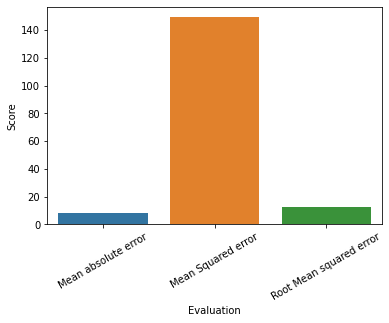

In [242]:
pf = [['Mean absolute error', 8.257173], ['Mean Squared error', 149.13935], ['Root Mean squared error', 12.2122625]]
df = pd.DataFrame(pf, columns=['Evaluation', 'Score'])
sns.barplot(data=df,x='Evaluation',y='Score')
plt.xticks(rotation=30)
plt.show()

## Remarks

- While Dealing with the price prediction our model gives a satisfactory results having RMSE of 12.2.